In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as coll

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from graphingFunctions import *

red = pd.read_csv("C:\\Users\\Connor\\Documents\\Machine_Learning\\winequality-red.csv", ";")
white = pd.read_csv("C:\\Users\\Connor\\Documents\\Machine_Learning\\winequality-white.csv", ";")

In [26]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [4]:
X = white.values[:, :-1]

In [5]:
y = white.values[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [7]:
scaler = StandardScaler()
print(X_train.shape)
scaler.fit(X_train)
  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

(3673, 11)


In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
predictions = mlp.predict(X_test)  
co = len(mlp.coefs_)
len(mlp.coefs_)
labels = list(white.columns.values)
labels = labels[:-1]
labels[:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

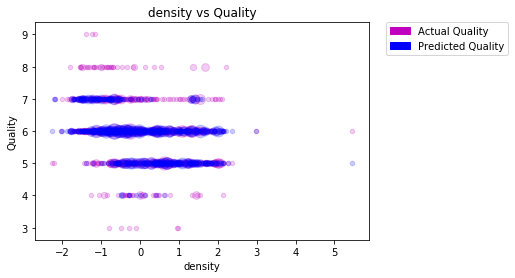

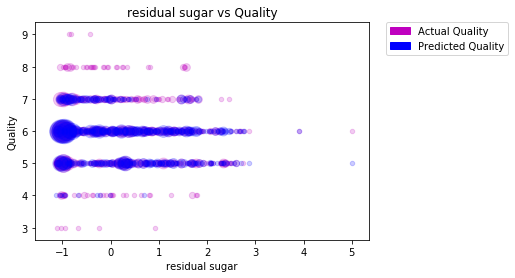

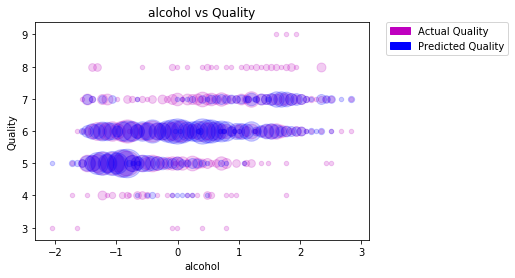

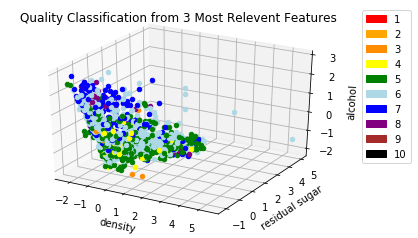

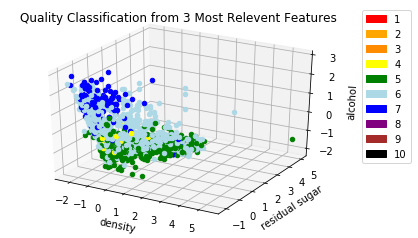

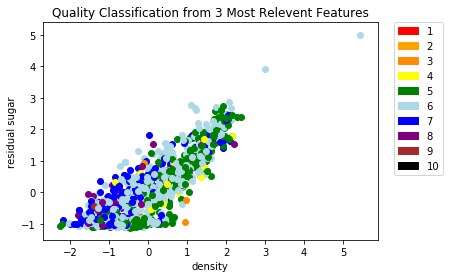

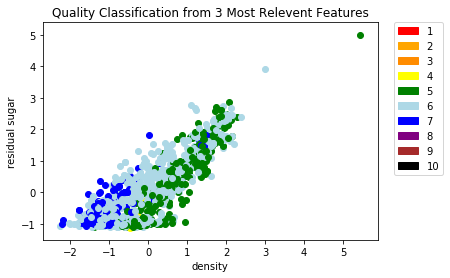

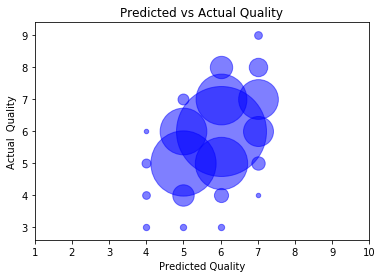

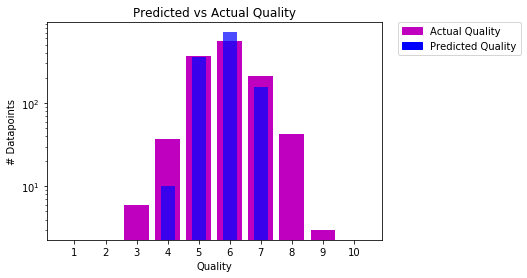


Mean squared error on training data: 0.59
Variance score (1 is perfect prediction): 0.25



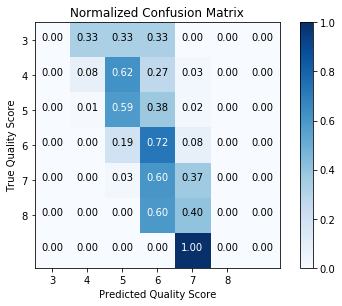

In [9]:
print_all_graphs(X_test, y_test, predictions, labels, 'Quality', 'white')

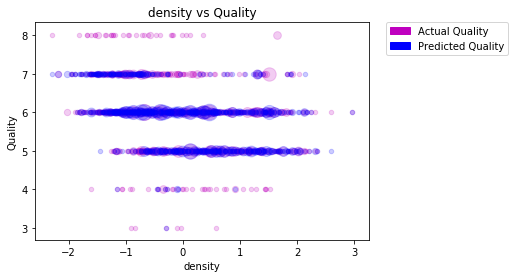

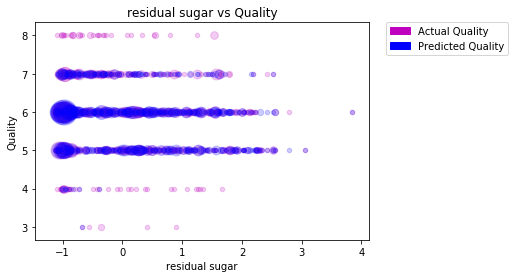

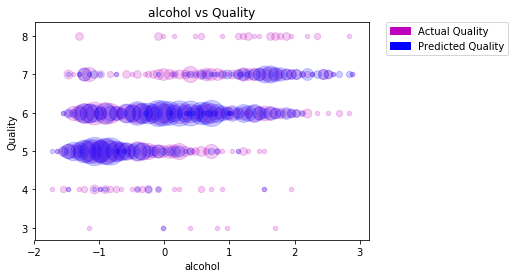

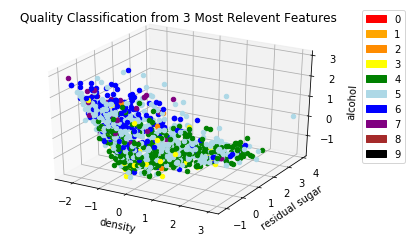

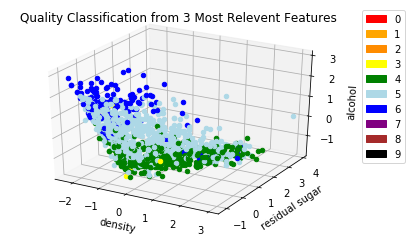

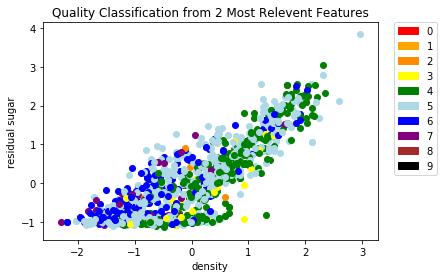

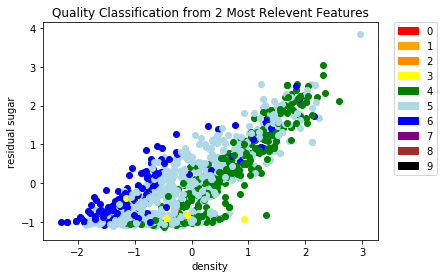

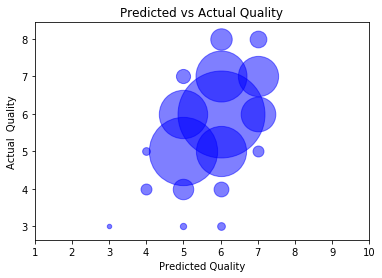

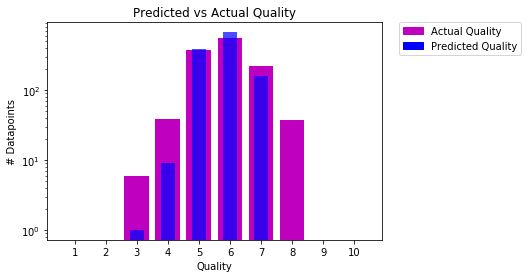


Mean squared error on training data: 0.58
Variance score (1 is perfect prediction): 0.23



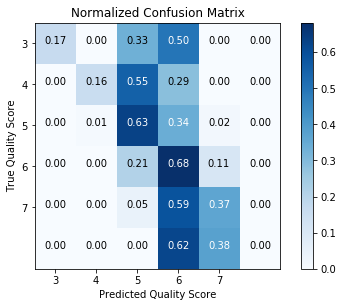

In [10]:
train_p = mlp.predict(X_train)


ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_train, y_train)
mlp.fit(X_train, y_train.ravel())
predictions = mlp.predict(X_test)  

print_all_graphs(X_test, y_test, predictions, labels, 'Quality', 'white')

[[0.97 0.03]
 [0.74 0.26]
 [0.75 0.25]
 ...
 [0.24 0.76]
 [0.68 0.32]
 [1.   0.  ]]


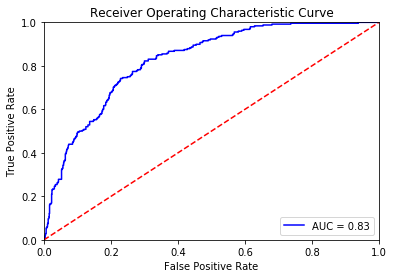

In [37]:
from sklearn import metrics

def make_roc_curve(binary_y, preds):
    fpr, tpr, threshold = metrics.roc_curve(binary_y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

by = white.values[:, -1]



for x in range(len(by)):
    if by[x] > 6:
        by[x] = 1
    else:
        by[x] = 0
X_train, X_test, by_train, by_test = train_test_split(X, by) 

scaler = StandardScaler()

scaler.fit(X_train)
  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, by_train.ravel())

probs = mlp.predict_proba(X_test) 
preds = probs[:,1]

make_roc_curve(by_test, preds)

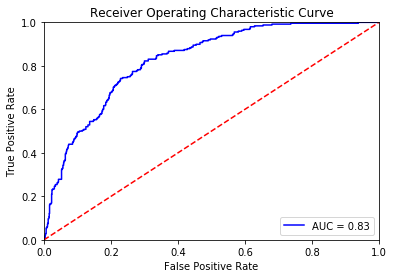

In [38]:
ros = RandomOverSampler(random_state = 0)
bX_resample, by_resample = ros.fit_sample(X_train, by_train)
mlp.fit(X_train, by_train.ravel())
predictions = mlp.predict(X_test) 

probs_o = mlp.predict_proba(X_test) 
preds_o = probs[:,1]

fpr_o, tpr_o, threshold_o = metrics.roc_curve(by_test, preds_o)
roc_auc_o = metrics.auc(fpr_o, tpr_o)

plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr_o, tpr_o, 'b', label = 'AUC = %0.2f' % roc_auc_o)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()